In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing The libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
from sklearn.metrics import classification_report

In [6]:
seed=4
tf.random.set_seed(4)

## Load The MNIST data set from keras and Kaagle

In [7]:
data = tf.keras.datasets.mnist

In [8]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)

In [10]:
X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_train

array([5, 0, 4, ..., 4, 5, 6])

In [13]:
len(pd.unique(y_train))

10

In [15]:
valid_data = pd.read_csv('/content/drive/MyDrive/Number_Recognition/train.csv')

In [16]:
test_data = pd.read_csv('/content/drive/MyDrive/Number_Recognition/test.csv')

# Data Preprocessing

In [17]:
y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values

In [18]:
x_validation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
y_validation

array([1, 0, 1, ..., 7, 6, 9])

### Reshaping The data

In [20]:
x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)
x_test = test_data.values.reshape(test_data.shape[0], 28,28)

x_train.shape, y_train.shape, x_validation.shape, y_validation.shape,  x_test.shape

((70000, 28, 28), (70000,), (42000, 28, 28), (42000,), (28000, 28, 28))

### Plot the first sample digit images with their actual label

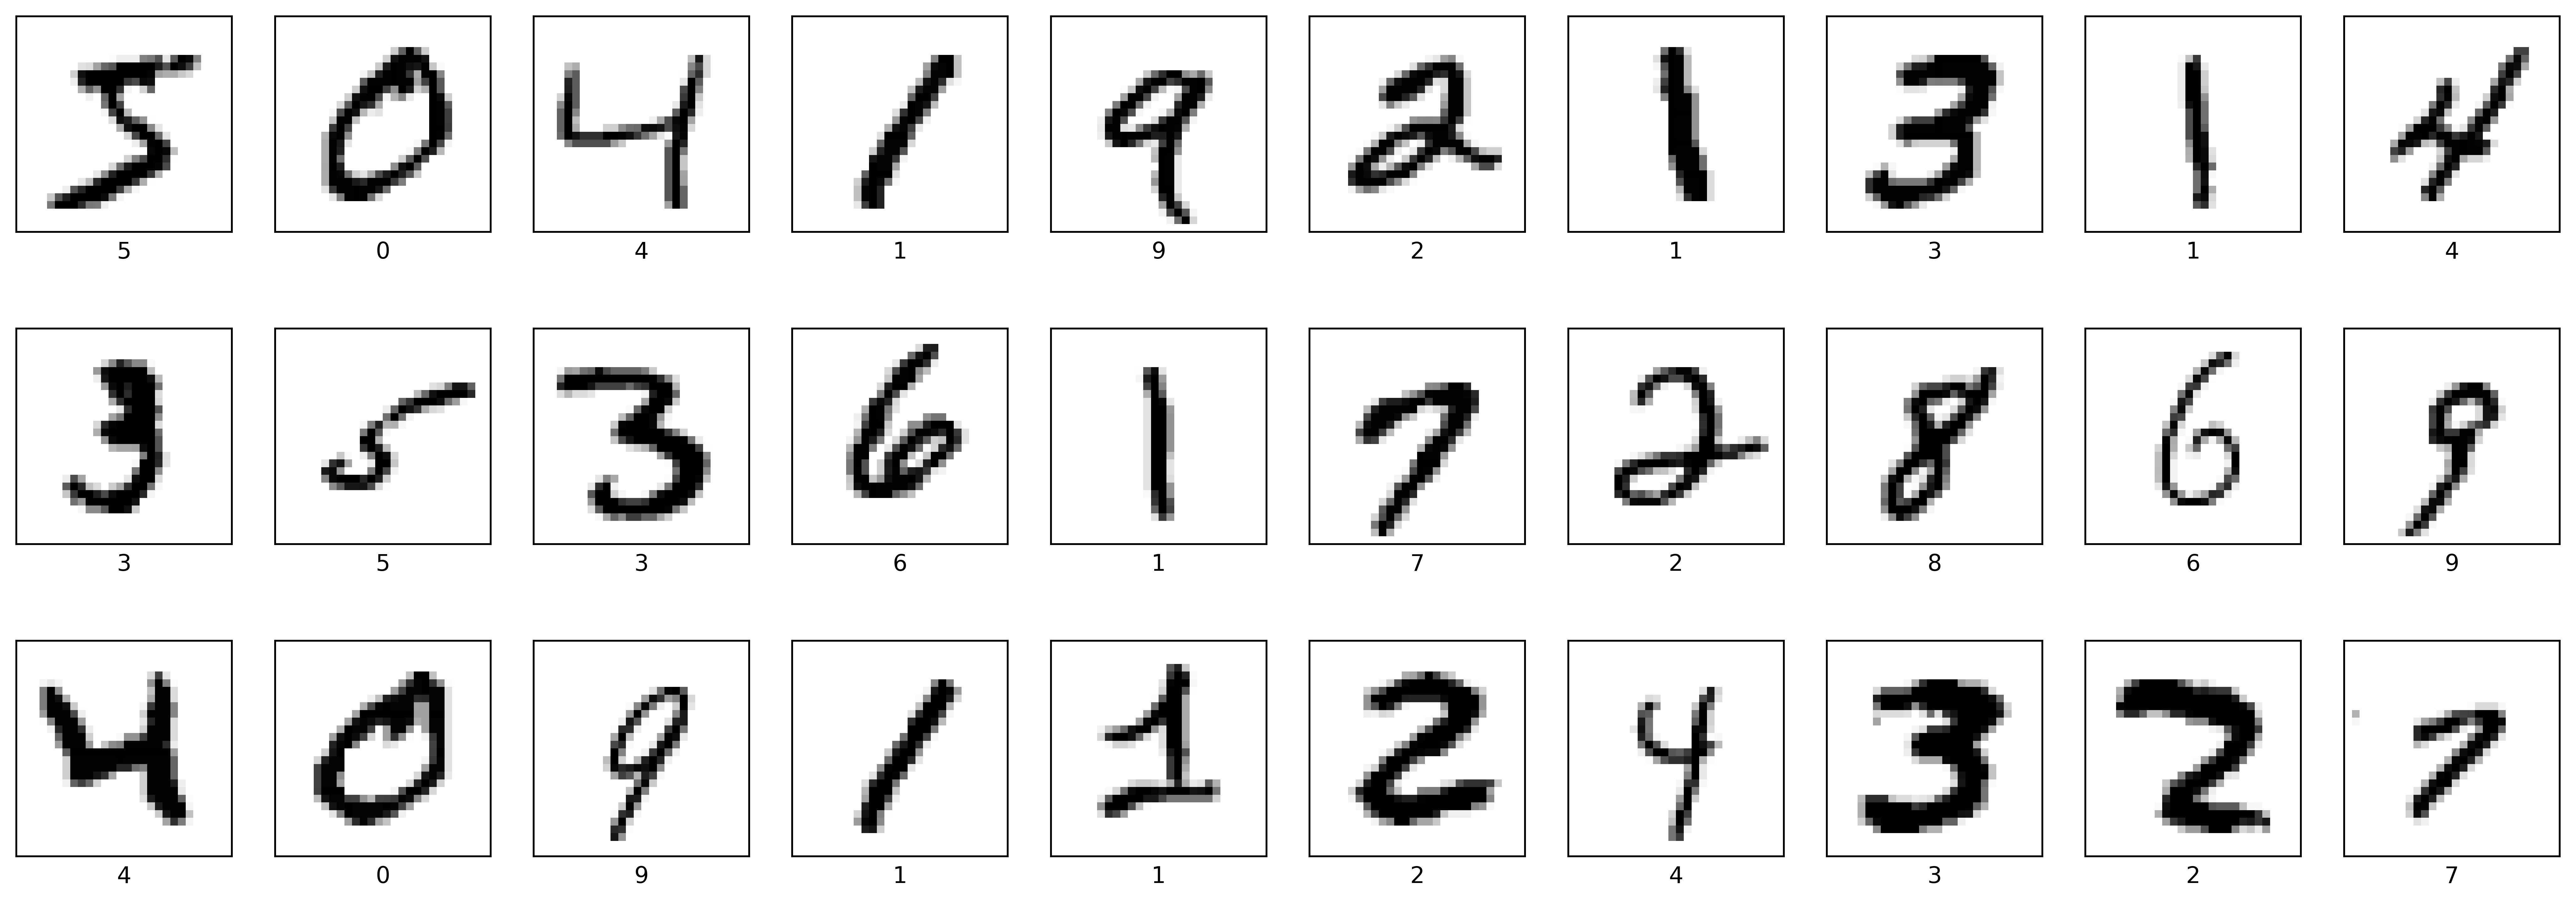

In [24]:
plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])                  
plt.show()

### Adding Dimension

In [25]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)
print('Test Data shape       :',x_test.shape) 

Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (42000, 28, 28, 1)
Test Data shape       : (28000, 28, 28, 1)


### Normalization

In [26]:
x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255

### Encoding the labels

In [27]:
y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

# Model Implementation

In [50]:
batch = 100
epochs = 70

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch

700

In [31]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)

image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [32]:
print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
There are total 10 unique digits


In [37]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu 
    
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),                        
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 64)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        65600     
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        16448     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)         

### Visualizing the model

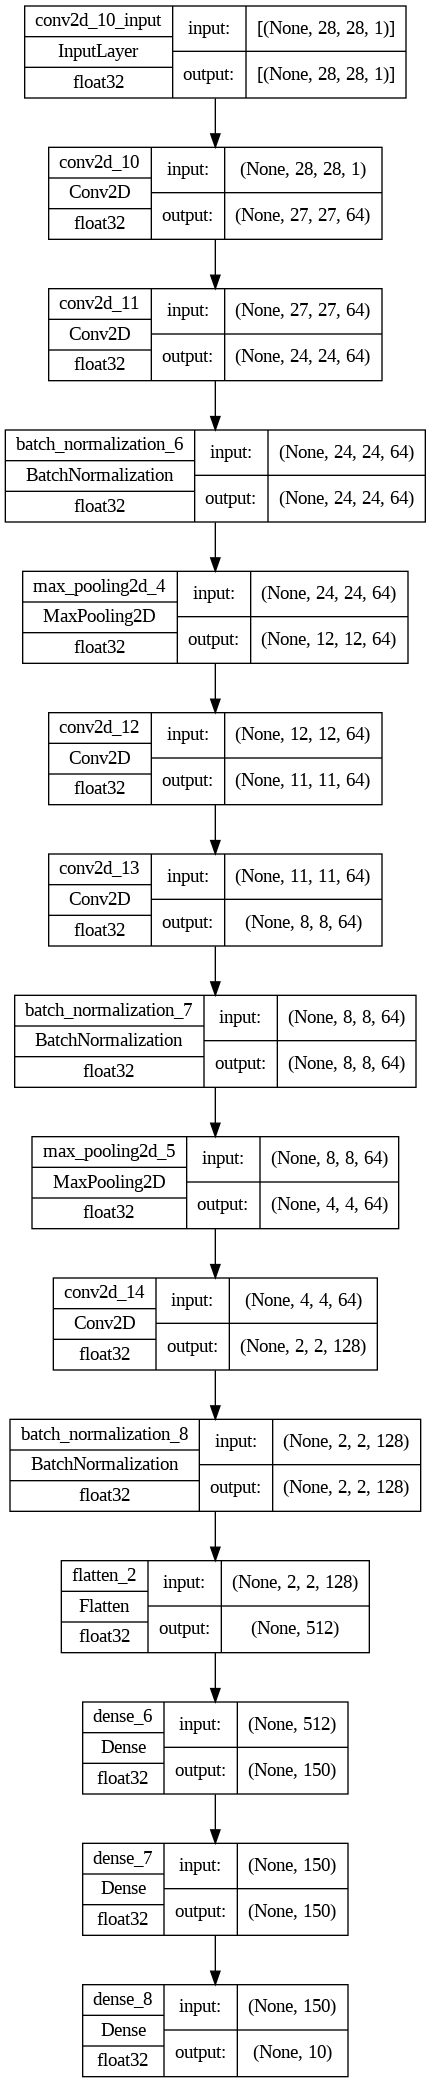

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)

In [40]:
### .et the learning rate = 
lr_rate = 0.0001

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)

In [42]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate', 
                                                 save_best_only = True, 
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')


In [43]:
tn = tf.keras.callbacks.TerminateOnNaN()

In [44]:
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [45]:
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4, 
                                                  verbose = 3)

###  optimizer and loss function for training

In [47]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate) 

### model compilation

In [48]:
model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])

### Training the model

In [51]:
history = model.fit(image_generator, 
                    epochs=epochs, 
                    validation_data=(x_valid, y_valid_), 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [lr_scheduler, lr_plateau, checkpoint_callback, early_stopping, tn]
                   )

Epoch 1/70
700/700 [==============================] - 418s 598ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0300 - val_accuracy: 0.9907 - lr: 1.0000e-04
Epoch 2/70
700/700 [==============================] - 416s 595ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0186 - val_accuracy: 0.9941 - lr: 1.0000e-04
Epoch 3/70
700/700 [==============================] - 417s 596ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0194 - val_accuracy: 0.9938 - lr: 1.0000e-04
Epoch 4/70
700/700 [==============================] - 414s 592ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0160 - val_accuracy: 0.9949 - lr: 1.0000e-04
Epoch 5/70
700/700 [==============================] - 414s 592ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0158 - val_accuracy: 0.9950 - lr: 1.0000e-04
Epoch 6/70
700/700 [==============================] - 416s 594ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0131 - val_accuracy: 0.9958 - lr: 1.0000e-04
Epoch 7/70
700/700 [==

# Model Evaluation

In [52]:
loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')

1313/1313 [==============================] - 98s 74ms/step - loss: 0.0131 - accuracy: 0.9958
The accuracy of model on unknown data is 99.5809 %


In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

### Training Accuracy annd Loss

In [66]:
acc = history_dict['accuracy']
acc

[0.9883428812026978,
 0.9901428818702698,
 0.9901999831199646,
 0.9911428689956665,
 0.9920285940170288,
 0.9929714202880859,
 0.9928857088088989,
 0.9931142926216125,
 0.9941142797470093]

In [67]:
loss = history_dict['loss']  
loss

[0.038631733506917953,
 0.031431276351213455,
 0.02980751171708107,
 0.027634309604763985,
 0.026443960145115852,
 0.021435851231217384,
 0.023589927703142166,
 0.020728373900055885,
 0.01739620976150036]

### Validation Accuracy and Loss

In [68]:
val_acc = history_dict['val_accuracy']  
val_acc

[0.9907380938529968,
 0.9940952658653259,
 0.9937857389450073,
 0.9949047565460205,
 0.9950000047683716,
 0.9958094954490662,
 0.9933809638023376,
 0.9958571195602417,
 0.9949761629104614]

In [69]:
val_loss = history_dict['val_loss']
val_loss

[0.029967572540044785,
 0.018633201718330383,
 0.019441844895482063,
 0.016016019508242607,
 0.015750953927636147,
 0.013114407658576965,
 0.02102448046207428,
 0.013056674040853977,
 0.015590224415063858]

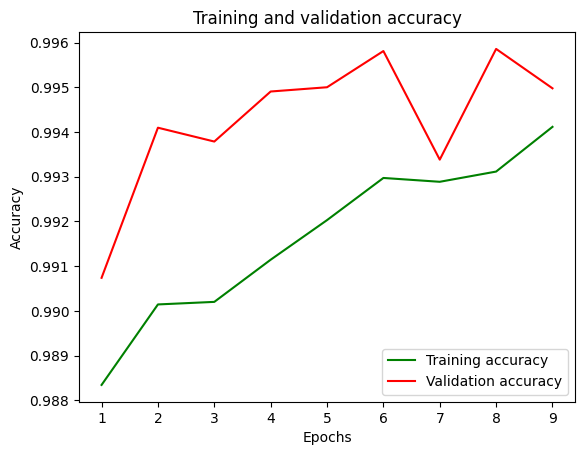

In [76]:
epochs = np.arange(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')                 
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')            
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

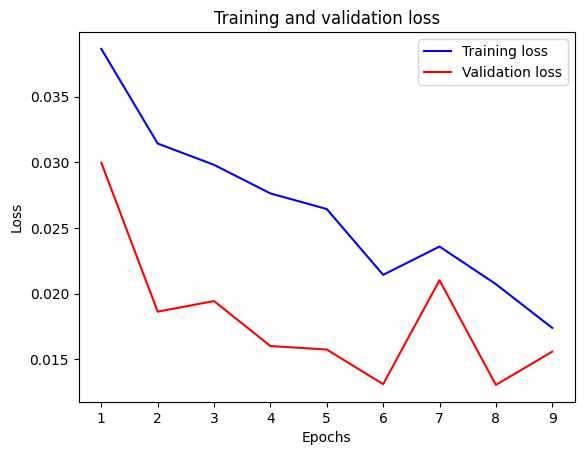

In [78]:
epochs = range(1, len(acc) + 1)                                  
plt.plot(epochs, loss, 'b', label='Training loss')         
plt.plot(epochs, val_loss, 'r', label='Validation loss')     
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generating the predictions on Validation Set

In [141]:
y_predicted = model.predict(x_valid) 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',y_validation[:10])

1313/1313 [==============================] - 88s 67ms/step
Predicted Label : [1, 0, 1, 4, 0, 0, 7, 3, 5, 3]
Actual Label    : [1 0 1 4 0 0 7 3 5 3]


### Confusion Matrix

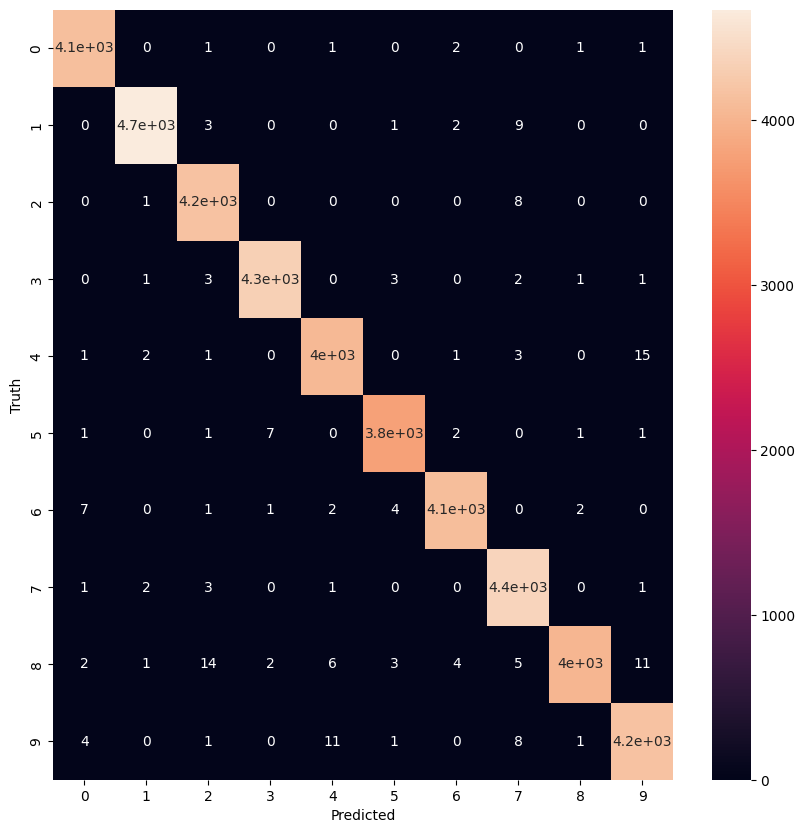

In [81]:
cm = tf.math.confusion_matrix(labels = y_validation, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [82]:
print("Classification Report: \n", classification_report(y_validation, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       0.99      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       0.99      0.99      0.99      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       0.99      1.00      1.00      4401
           8       1.00      0.99      0.99      4063
           9       0.99      0.99      0.99      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



# Validating the predictions

In [83]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} ({:2.0f}%) \n Truth : {}".format(predicted_label, (100*np.max(predictions_array)),
                                                          true_label), color=color)
    


In [84]:
def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [96]:
# for 25 images
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

## Inaccurate Predictions

In [142]:
count = 0
wrong_predictions = []
for i in range(len(y_validation)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != y_validation[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in Validation datasets')
print('Wrong predicted indices :\n',wrong_predictions)

There are 176 wrong predictions in Validation datasets
Wrong predicted indices :
 [125, 131, 516, 639, 641, 644, 799, 1628, 1979, 2316, 2453, 2628, 2914, 3324, 3521, 3997, 4020, 4040, 4226, 4924, 4967, 4972, 5124, 5390, 5541, 5659, 5695, 5747, 6112, 6237, 6543, 6682, 6781, 6807, 7008, 7505, 7527, 7610, 7764, 7833, 7992, 8169, 8566, 8641, 9007, 9229, 10026, 10328, 10455, 10710, 10759, 11329, 11406, 11593, 12520, 12614, 12706, 12817, 12962, 13023, 13044, 13123, 13309, 14101, 14284, 14362, 14434, 14913, 15065, 15121, 15281, 15637, 15833, 15909, 15954, 16124, 16301, 16873, 17109, 17300, 17399, 17736, 17878, 18283, 18313, 18966, 18989, 19321, 19386, 19390, 19478, 19811, 19842, 19880, 19892, 20620, 20669, 21479, 21581, 22089, 22368, 22558, 23299, 23489, 23604, 23608, 23699, 23722, 23949, 24230, 24477, 24891, 25069, 25073, 25074, 25172, 25619, 25644, 25708, 25946, 26182, 26358, 26516, 27977, 28003, 28290, 28611, 28814, 29063, 29296, 29496, 29524, 29658, 29926, 29954, 30019, 30085, 30119, 3027

In [95]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

# Generating Predictions for Test data set

In [132]:
y_predicted = model.predict(X_test) 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',Y_test[:10])

313/313 [==============================] - 23s 74ms/step
Predicted Label : [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Actual Label    : [7 2 1 0 4 1 4 9 5 9]


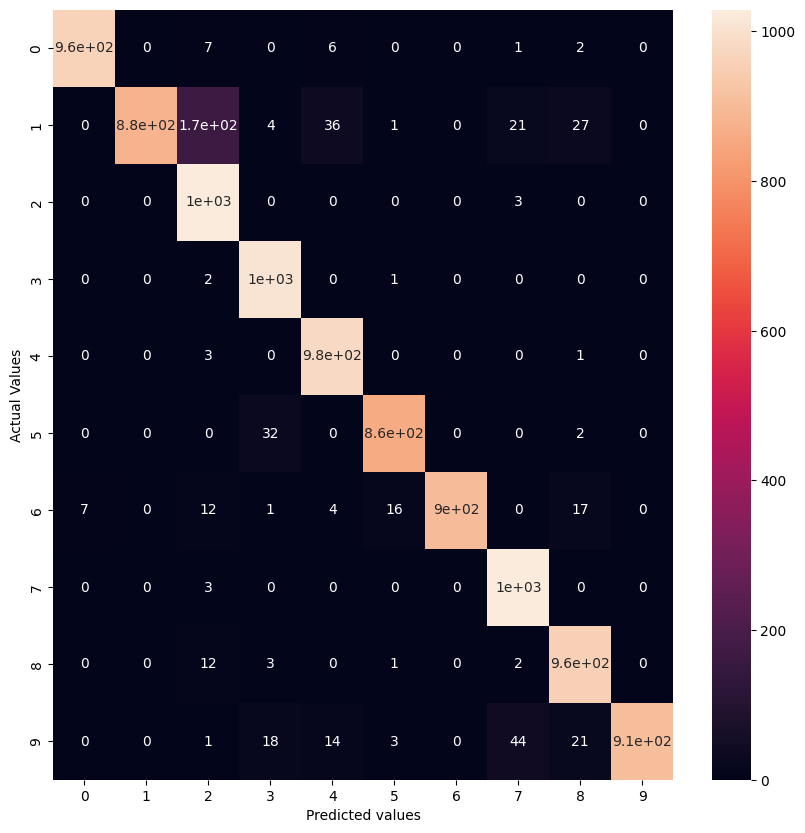

In [133]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [134]:
print("Classification Report: \n", classification_report(Y_test, y_predicted_labels)) ## 95%accuracy

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.77      0.87      1135
           2       0.83      1.00      0.91      1032
           3       0.95      1.00      0.97      1010
           4       0.94      1.00      0.97       982
           5       0.97      0.96      0.97       892
           6       1.00      0.94      0.97       958
           7       0.94      1.00      0.97      1028
           8       0.93      0.98      0.96       974
           9       1.00      0.90      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000



In [135]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

### Inaccurate Predictions

In [139]:
count = 0
wrong_predictions = []
for i in range(len(Y_test)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != Y_test[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in test datasets')
print('Wrong predicted indices :\n',wrong_predictions)

There are 495 wrong predictions in test datasets
Wrong predicted indices :
 [15, 57, 62, 94, 96, 145, 189, 202, 203, 204, 207, 214, 217, 224, 247, 251, 259, 264, 320, 321, 354, 357, 359, 409, 417, 445, 448, 480, 497, 506, 523, 582, 593, 619, 625, 674, 716, 767, 786, 797, 835, 836, 882, 896, 900, 907, 956, 962, 964, 965, 977, 1014, 1044, 1054, 1105, 1181, 1192, 1226, 1232, 1247, 1257, 1289, 1296, 1299, 1339, 1344, 1358, 1364, 1385, 1393, 1403, 1414, 1436, 1492, 1527, 1530, 1553, 1554, 1555, 1570, 1691, 1709, 1725, 1732, 1737, 1773, 1838, 1844, 1853, 1868, 1878, 1885, 1888, 1900, 1901, 1909, 1945, 1955, 1982, 1988, 1993, 1994, 2010, 2018, 2027, 2035, 2135, 2161, 2175, 2182, 2215, 2224, 2228, 2235, 2258, 2266, 2273, 2276, 2277, 2293, 2302, 2329, 2343, 2366, 2387, 2400, 2406, 2409, 2414, 2418, 2455, 2510, 2524, 2528, 2532, 2556, 2573, 2576, 2582, 2597, 2648, 2654, 2670, 2676, 2705, 2713, 2720, 2725, 2732, 2734, 2742, 2743, 2760, 2769, 2788, 2803, 2810, 2825, 2850, 2854, 2867, 2885, 2927, 2

In [140]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()